In [1]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from apifunctions import *

import matplotlib.pyplot as plt
from scipy import stats
import streamlit as st

pd.set_option("display.max_rows", None, "display.max_columns", None)

In [3]:
wacc=pd.read_csv("../data/wacc.csv",index_col = 'ID')
prices=pd.read_csv("../data/prices.csv")
sales_growth=pd.read_csv("../data/sales_growth.csv", index_col = 'ID')
parameters_new_t=pd.read_csv("../data/parameters_new_t.csv")
companies_to_use=pd.read_csv("../data/companies_to_use.csv")
market_cap=pd.read_csv("../data/market_cap.csv",index_col = 'ID')
shares_outstanding=pd.read_csv("../data/shares_outstanding.csv",index_col = 'ID')

In [ ]:
companies_to_use=companies_to_use['0'].values.tolist()

#### First we select the year and the list of companies for which we want to calculate the dcf_value and distributions

In [4]:
year="2021"
companies_to_use=companies_to_use

#### We first get the last year revenue of the companies we are interested in:


In [5]:
sales_last_year=last_year_rev(companies_to_use,parameters_new_t,year)

#### We rename the columns in the sales_growth dataset for simplicity

In [6]:
sales_growth.columns = ['2010', '2011', '2012', '2013','2014', '2015', '2016', '2017','2018', '2019', '2020', '2021']

#### We put into a list the growth rate we are going to use for the selected companies

In [7]:
growth_rate=growth_rate(companies_to_use,sales_growth,year)

#### We get the parameters we are going to use for the free cash flow calculations


In [50]:
ebitda_margin,depr_percent,nwc_percent,capex_percent,tax_rate=parameters(companies_to_use,parameters_new_t,year)

#### We calculate the free cash flows for the list of companies we have

In [51]:
free_cash_flows=[]
for i in range(len(ebitda_margin)):
    
    free_cash_flows.append(free_cash_flow(growth_rate[i],ebitda_margin[i],depr_percent[i],nwc_percent[i],capex_percent[i],tax_rate[i],sales_last_year[i],year))

#### we set the cash flows as dataframes so that we can plot them separately afterwards

In [52]:
data=pd.DataFrame(free_cash_flows[1])
data.rename(columns={0: "Free Cash Flow"}, inplace=True)



#### We calculate the dcf_value for each of the companies:

In [77]:
wacc.columns = ['2010', '2011', '2012', '2013','2014', '2015', '2016', '2017','2018', '2019', '2020', '2021']

#### We calculate the terminal value for each of the companies

In [13]:
dcf_values=[]
for i in range(len(ebitda_margin)):
    
    dcf_values.append(terminal_value(wacc["2021"][i],free_cash_flows[i],growth_rate[i]))

#### We iterate 10,000 times the values of sales_growth, ebitda_margin and nwc_percent  using a monte_carlo simulation to get the distribution of the price for each company

In [14]:
output_distribution=[]

for j in range(len(companies_to_use)):

    
    growth_rate_f=growth_rate[j]
    ebitda_margin_f=ebitda_margin[j]
    depr_percent_f=depr_percent[j]
    nwc_percent_f=nwc_percent[j]
    capex_percent_f=capex_percent[j]
    tax_rate_f=tax_rate[j]
    sales_last_year_f=sales_last_year[j]
    wacc_f=wacc[year][companies_to_use[j]]
    free_cash_flows_f=free_cash_flows[j]

    output_distribution.append(run_mcs(growth_rate_f,ebitda_margin_f,depr_percent_f,nwc_percent_f,capex_percent_f,tax_rate_f,sales_last_year_f,wacc_f,free_cash_flows_f))
    

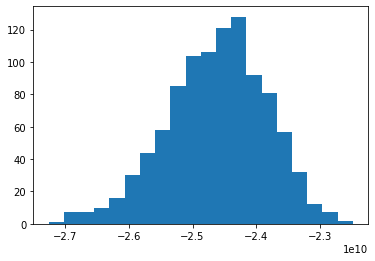

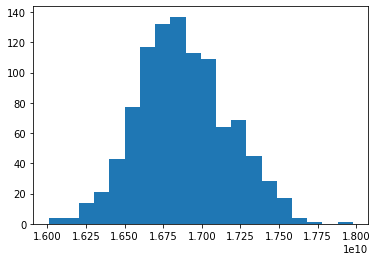

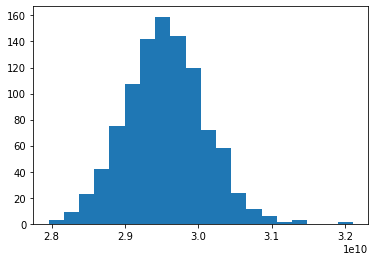

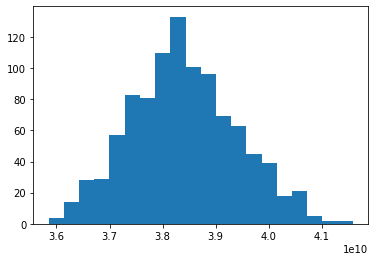

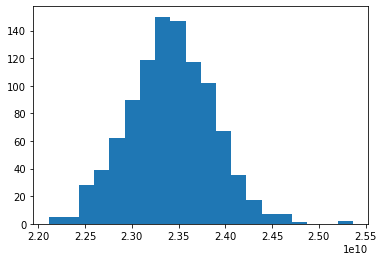

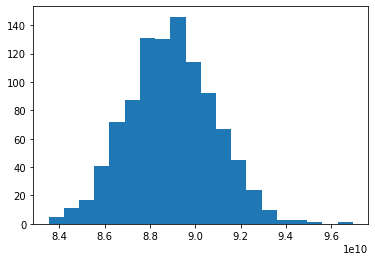

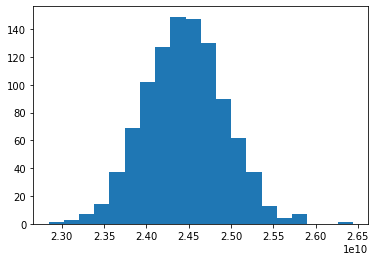

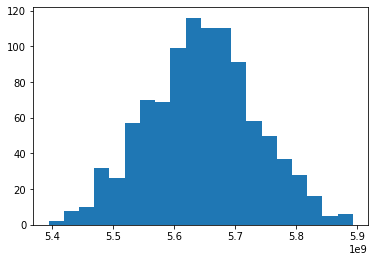

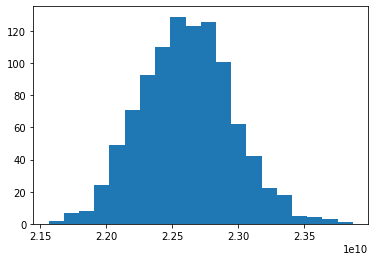

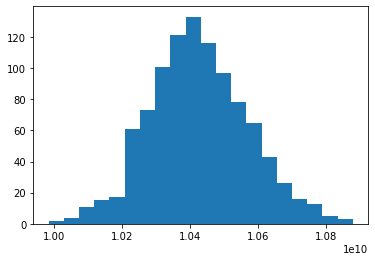

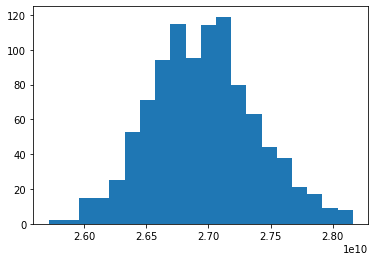

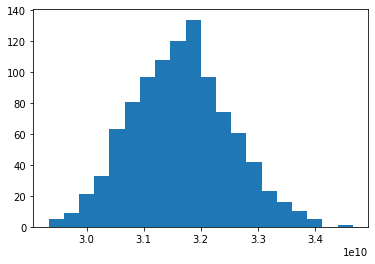

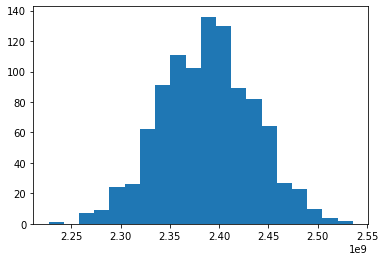

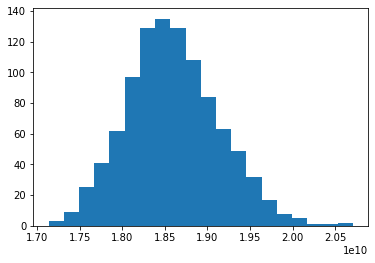

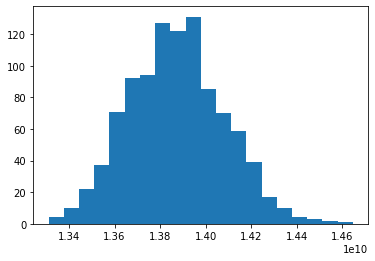

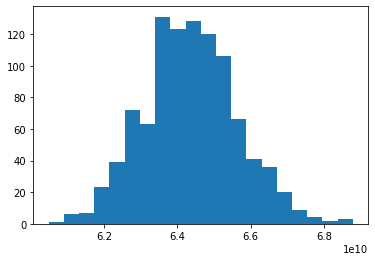

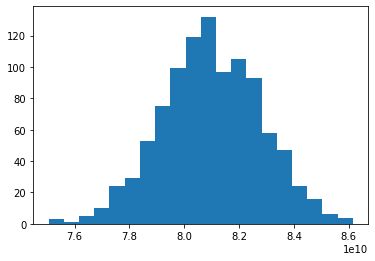

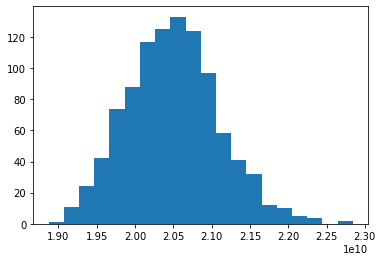

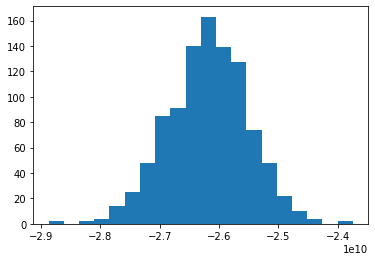

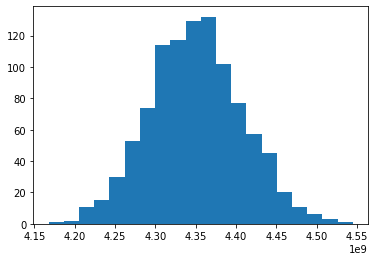

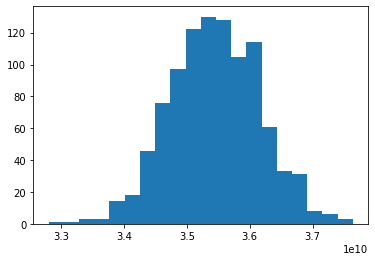

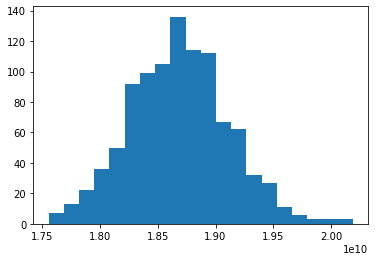

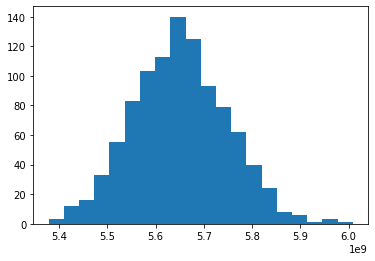

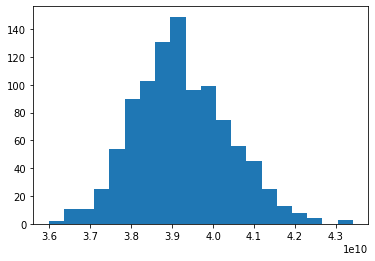

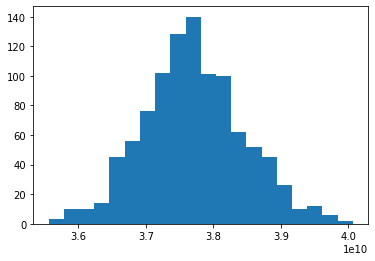

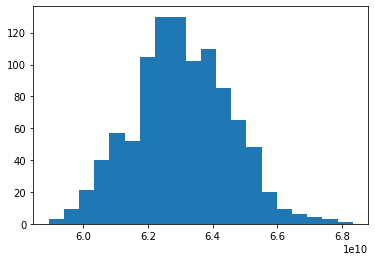

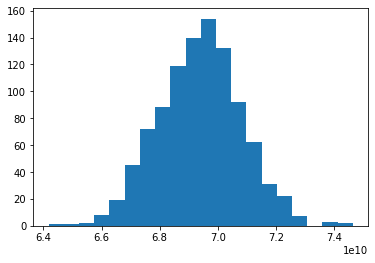

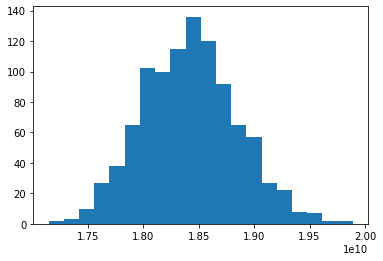

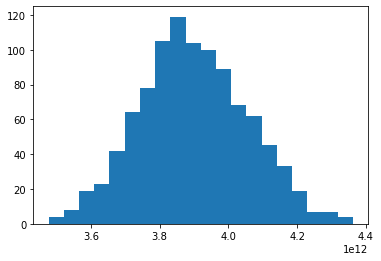

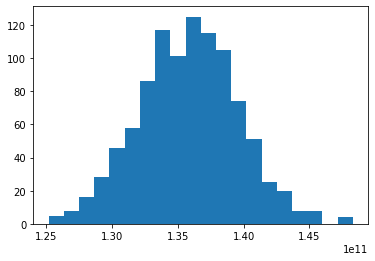

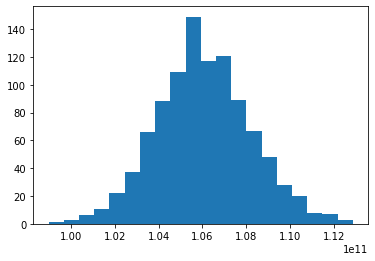

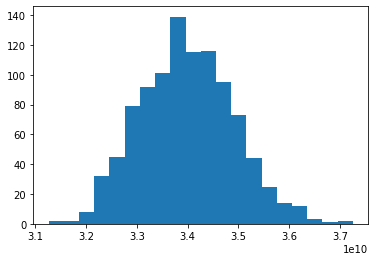

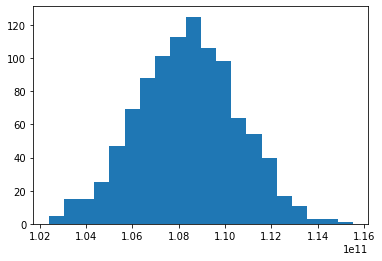

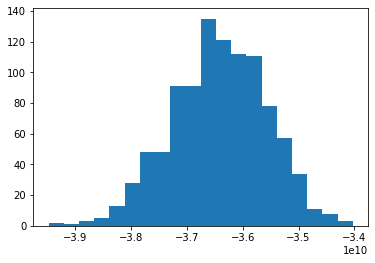

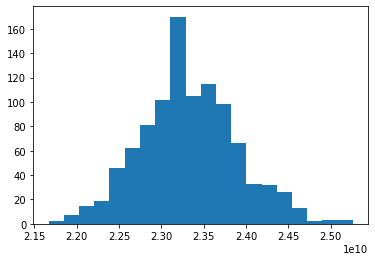

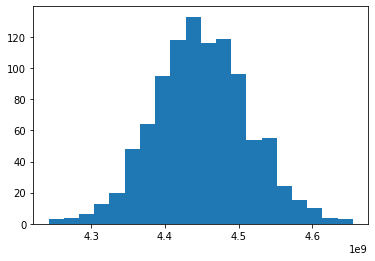

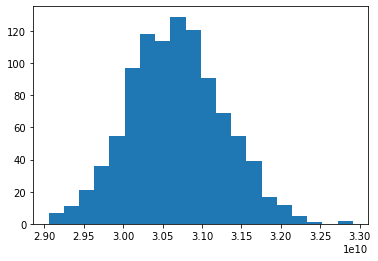

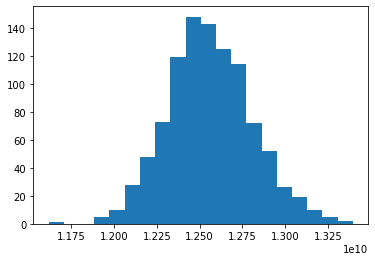

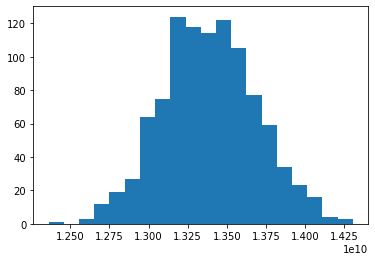

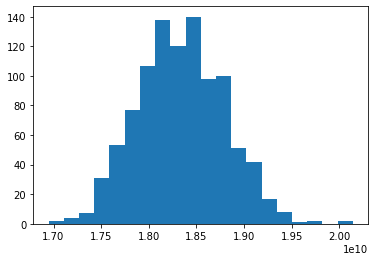

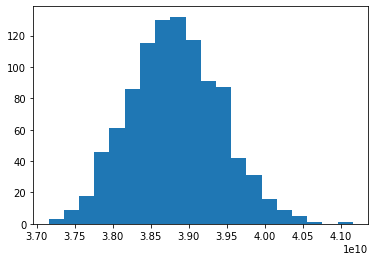

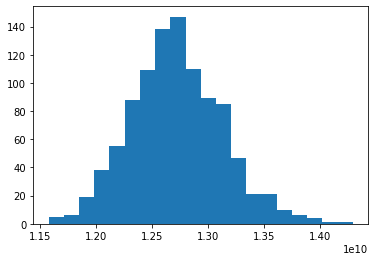

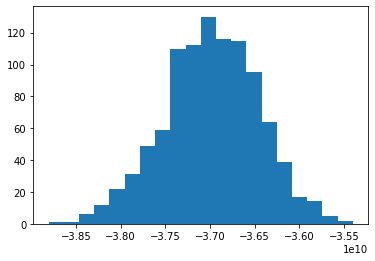

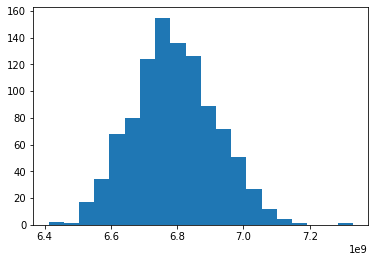

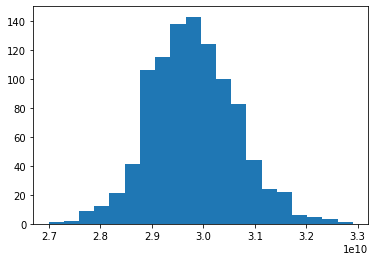

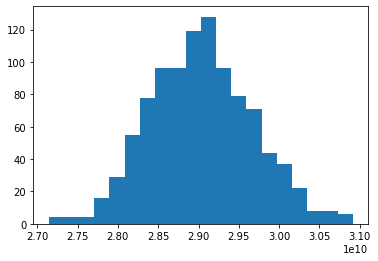

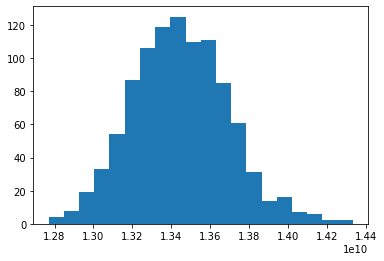

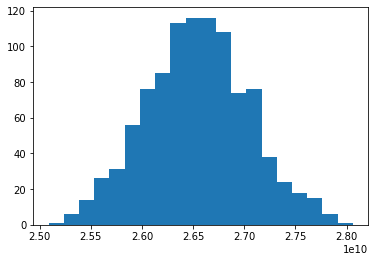

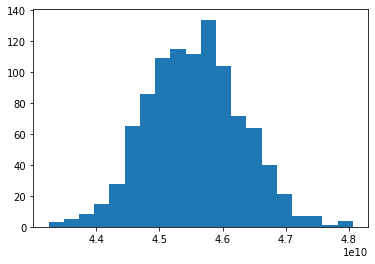

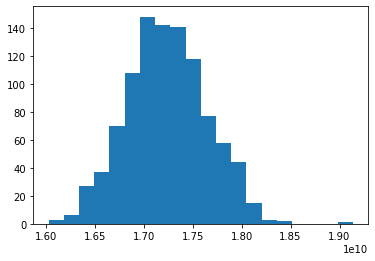

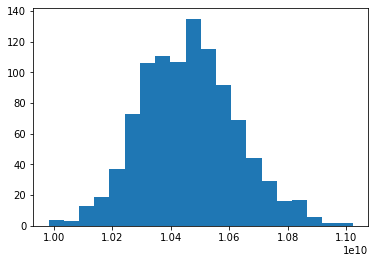

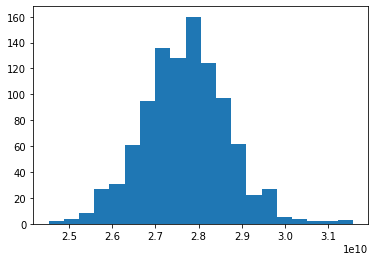

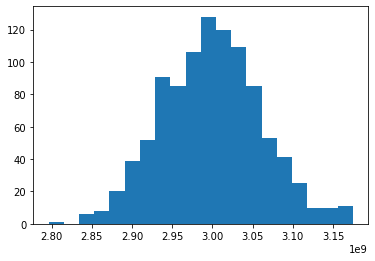

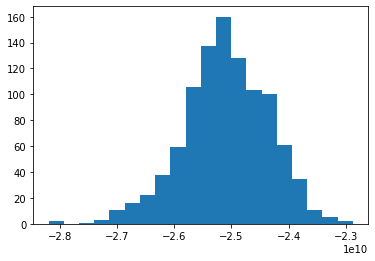

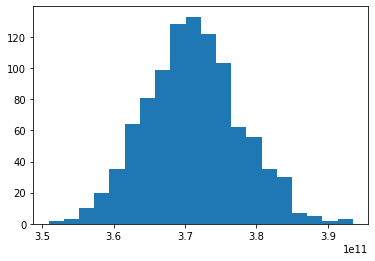

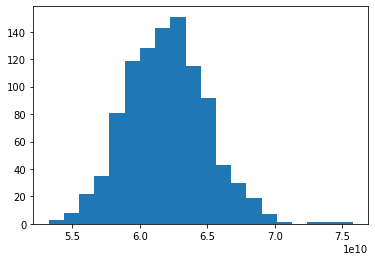

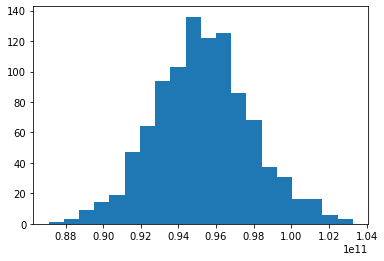

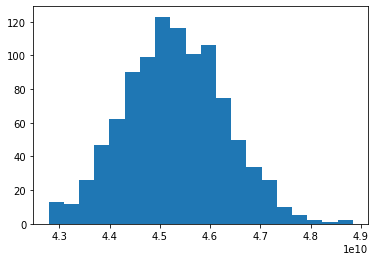

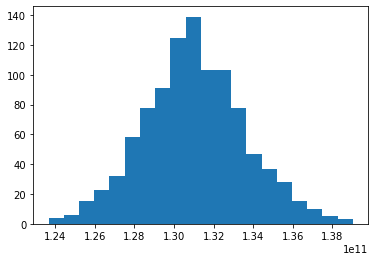

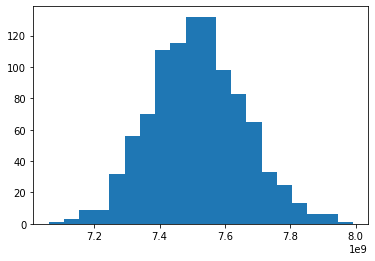

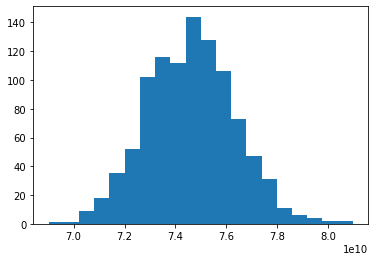

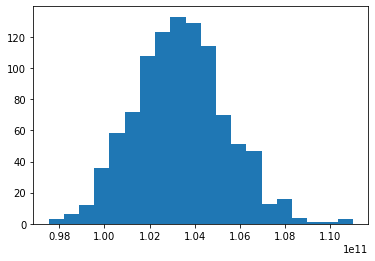

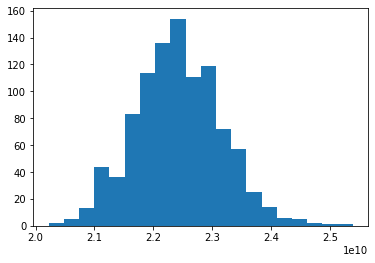

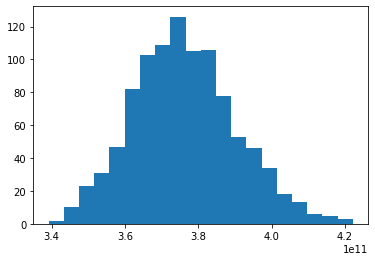

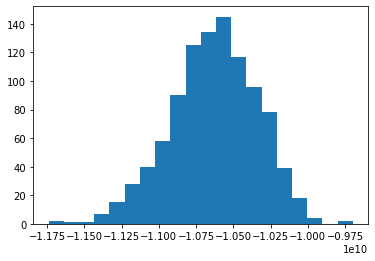

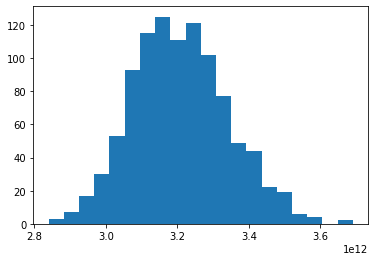

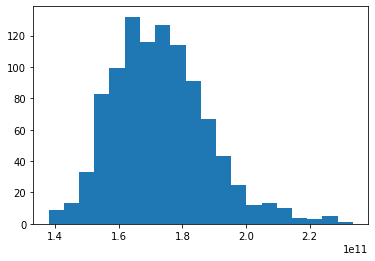

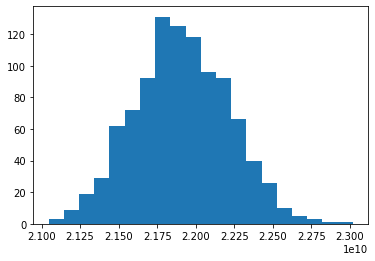

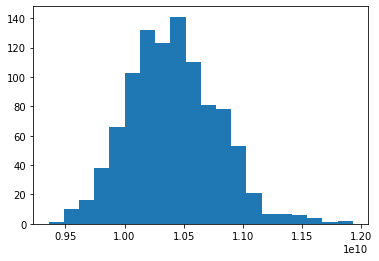

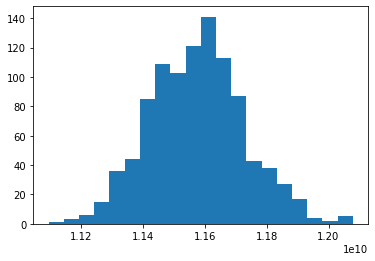

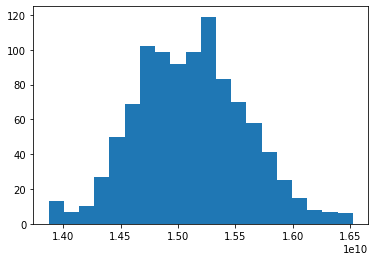

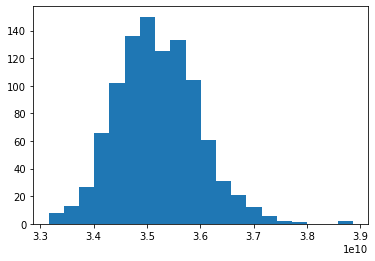

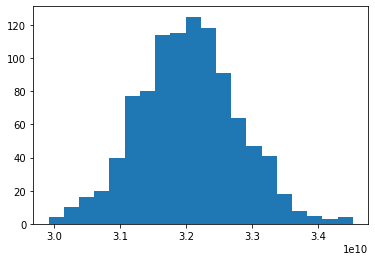

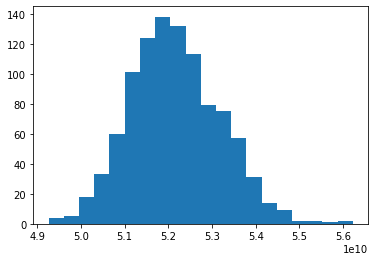

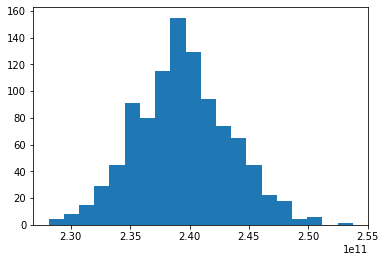

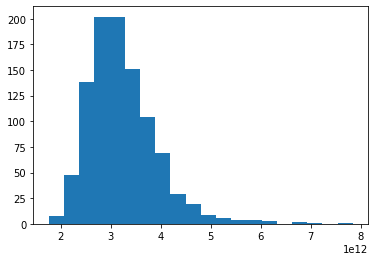

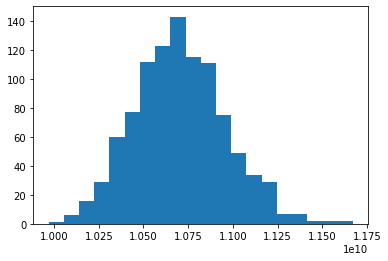

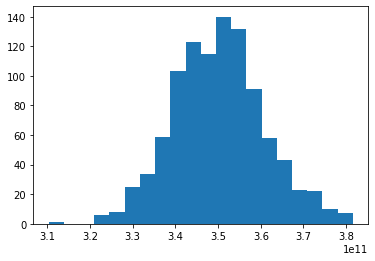

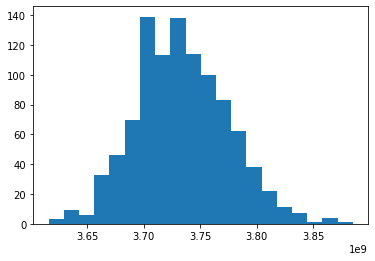

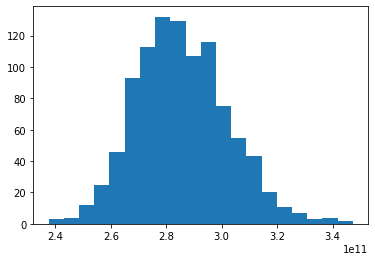

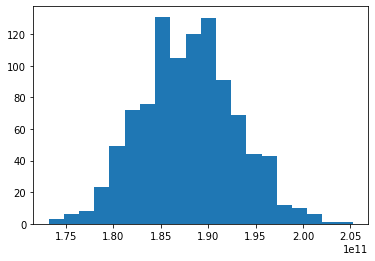

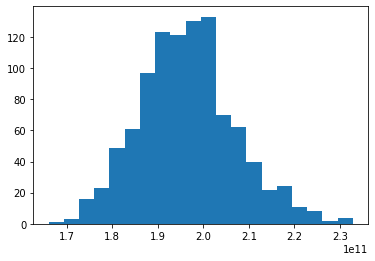

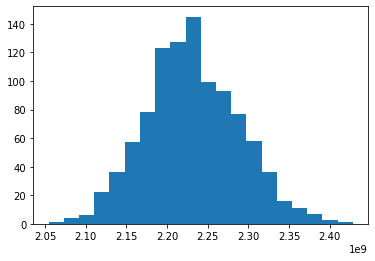

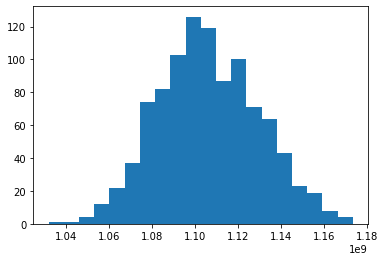

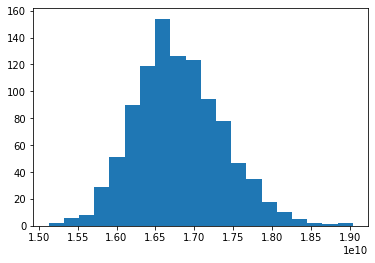

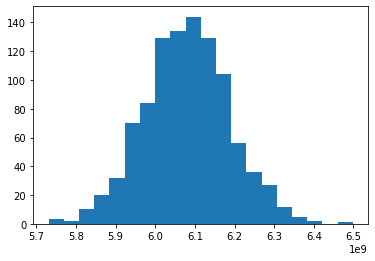

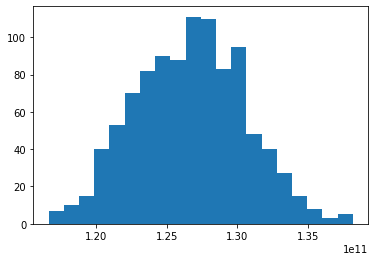

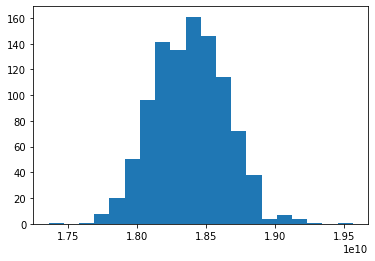

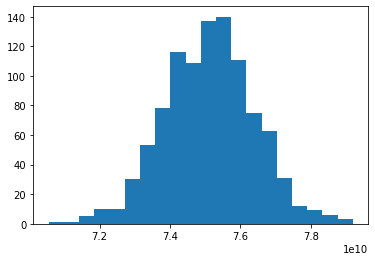

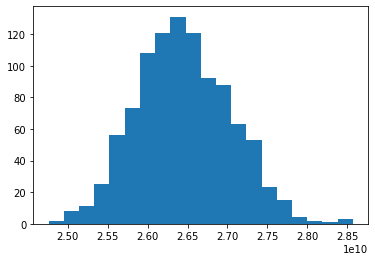

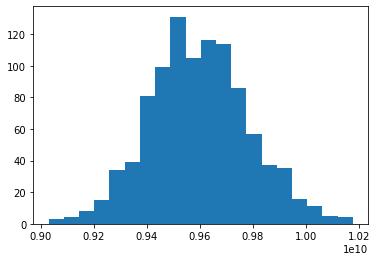

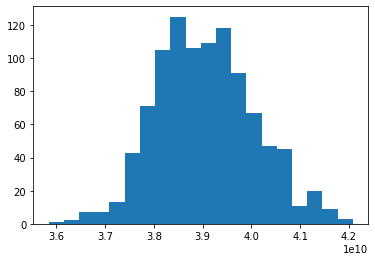

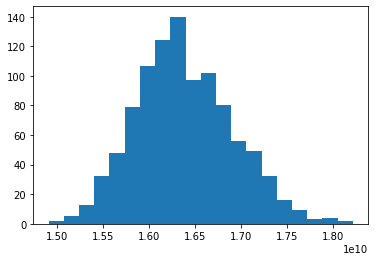

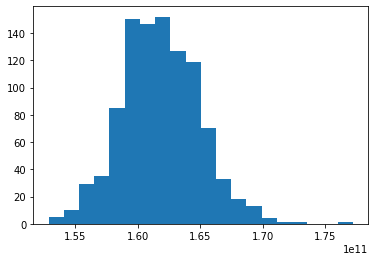

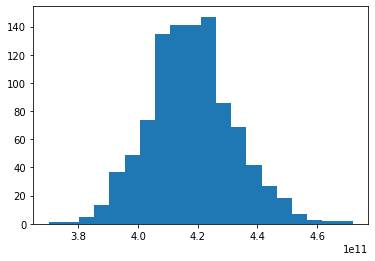

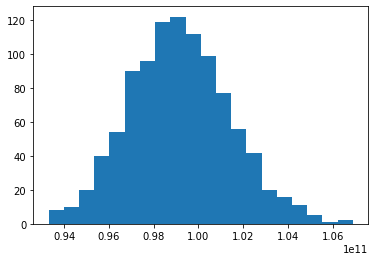

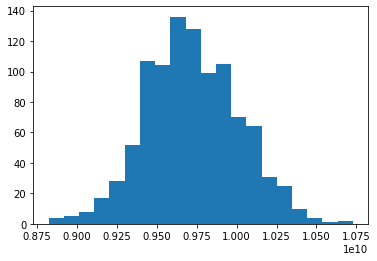

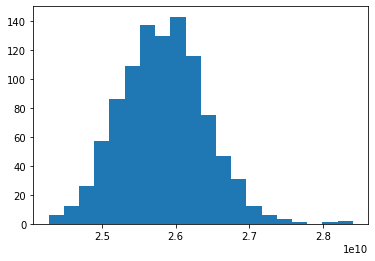

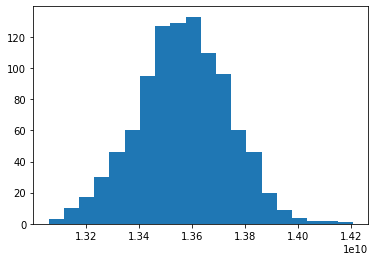

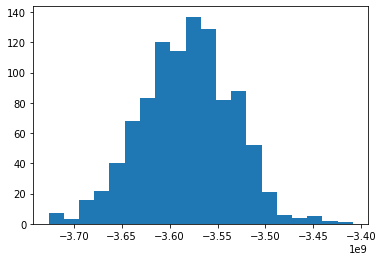

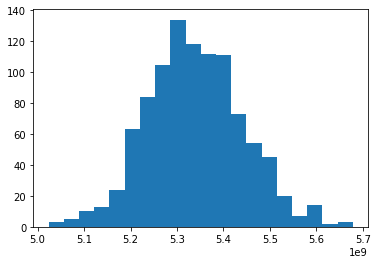

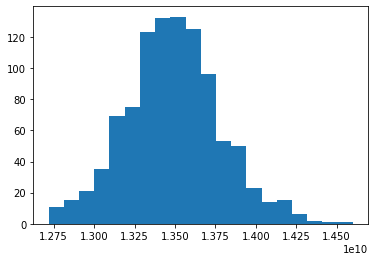

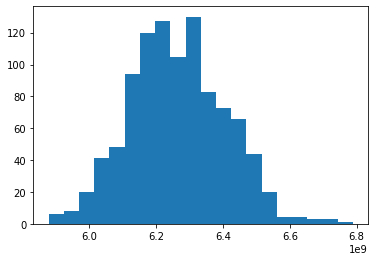

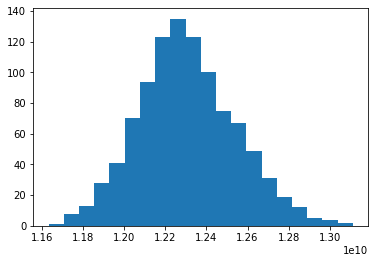

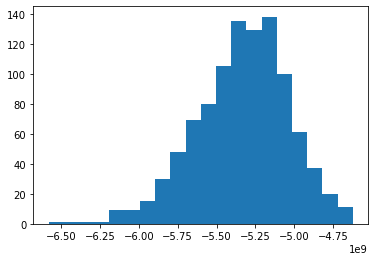

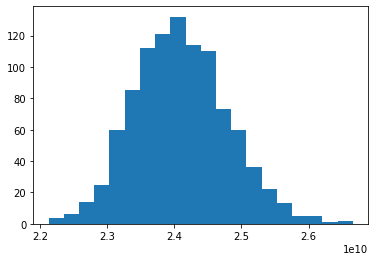

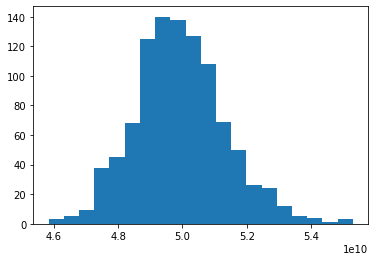

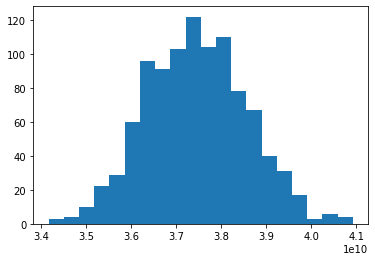

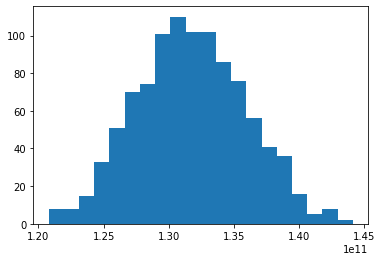

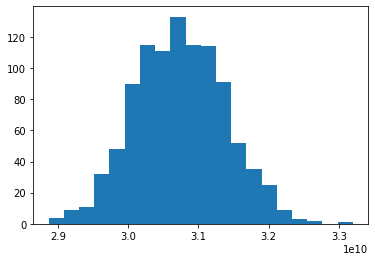

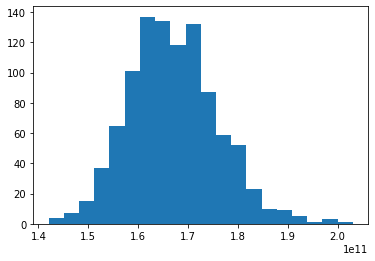

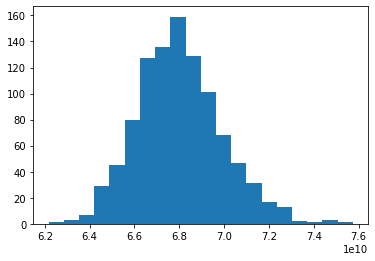

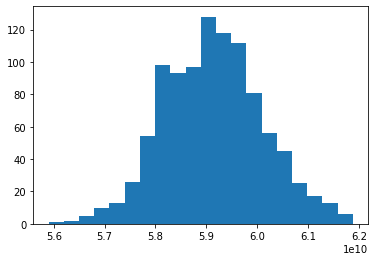

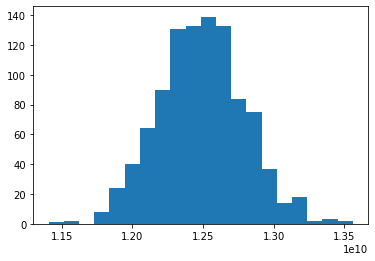

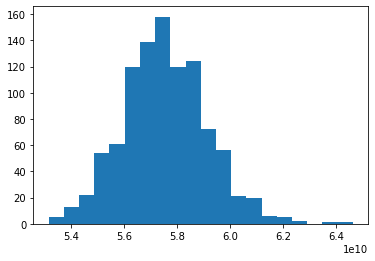

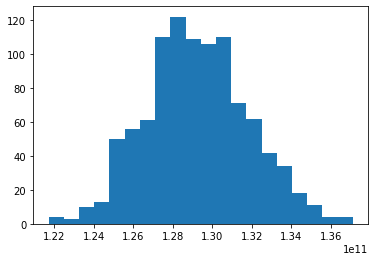

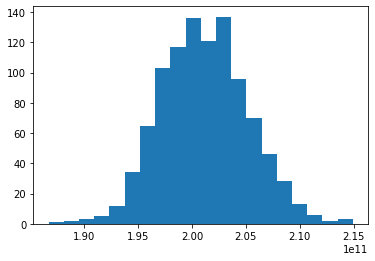

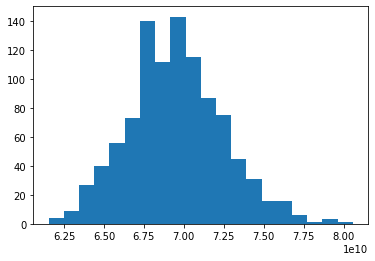

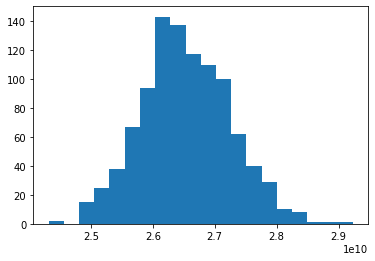

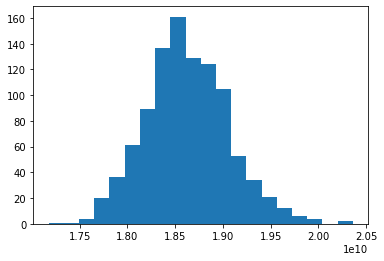

In [15]:
mode=[]

for i in output_distribution:
    
    mode.append(max(set(i), key=i.count))
    plt.hist(i, bins = 20)
    plt.show()

In [70]:
company="CAT UN Equity"

In [71]:
years=['2010', '2011', '2012', '2013','2014', '2015', '2016', '2017','2018', '2019', '2020', '2021']

In [61]:
def y_growth_rate(companies_to_use,sales_growth,year):

    '''This function places into a list the growth rate of the companies that we are interested in'''
    
    yearly_growth_rate=[]
    for i in years:
        
        yearly_growth_rate.append(float(sales_growth[i][company]))
        
    return yearly_growth_rate 

In [66]:
yearly_growth_rate=growth_rate(company,sales_growth,years)

In [74]:
yearly_sales_growth,yearly_sales,yearly_ebitda,yearly_depr_prct,yearly_nwc_percent,yearly_capex_percent,yearly_tax_rate=yearly_parameters(years,company,sales_growth,parameters_new_t)

In [75]:
fcf_list=[]
for i in range(len(years)):

    fcf_list.append(free_cash_flow(yearly_sales_growth[i],yearly_ebitda[i],yearly_depr_prct[i],yearly_nwc_percent[i],yearly_capex_percent[i],yearly_tax_rate[i],yearly_sales[i],years[i]))

In [78]:
terminal_values=[]
for i in range(len(years)):
    
    terminal_values.append(terminal_value(wacc[years[i]][company],fcf_list[i],yearly_sales_growth[i]))



In [85]:
#from scipy import stats
output_distributions=[]
for i in range(len(years)):

    output_distributions.append(run_mcs(yearly_sales_growth[i],yearly_ebitda[i],yearly_depr_prct[i],yearly_nwc_percent[i],yearly_capex_percent[i],yearly_tax_rate[i],yearly_sales[i],wacc[years[i]][company],fcf_list[i]))

In [93]:
mode=[]

for i in output_distribution:
        
    mode.append(float(max(set(i), key=i.count)))



### Investing startegy part

In [167]:
#companies_to_use=companies_to_use.drop("Unnamed: 0", axis=1)

In [173]:
#companies_to_use=companies_to_use.rename(columns={"0":"company_name"})

In [4]:
companies_to_use=companies_to_use['0'].values.tolist()

In [5]:
sales_growth.columns = ['2010', '2011', '2012', '2013','2014', '2015', '2016', '2017','2018', '2019', '2020', '2021']  
wacc.columns = ['2010', '2011', '2012', '2013','2014', '2015', '2016', '2017','2018', '2019', '2020', '2021']  

In [6]:
years = ['2010', '2011', '2012', '2013','2014', '2015', '2016', '2017','2018', '2019', '2020', '2021']

In [45]:
    mode_21=[]
#for i in years:
    i="2021"
    #sales_growth=pd.read_csv("../data/sales_growth.csv", index_col = 'ID')
    #sales_growth.columns = ['2010', '2011', '2012', '2013','2014', '2015', '2016', '2017','2018', '2019', '2020', '2021'] 
    
    sales_last_year=last_year_rev(companies_to_use,parameters_new_t,i)
    growth_rate_1=growth_rate(companies_to_use,sales_growth,i)
    ebitda_margin,depr_percent,nwc_percent,capex_percent,tax_rate=parameters(companies_to_use,parameters_new_t,i)
    
    free_cash_flows=[]
    for j in range(len(ebitda_margin)):
    
        free_cash_flows.append(free_cash_flow(growth_rate_1[j],ebitda_margin[j],depr_percent[j],nwc_percent[j],capex_percent[j],tax_rate[j],sales_last_year[j],i))
    
    dcf_values=[]
    for k in range(len(ebitda_margin)):
    
        dcf_values.append(terminal_value(wacc[i][k],free_cash_flows[k],growth_rate_1[k]))
    
    output_distribution=[]

    for m in range(len(companies_to_use)):

    
        growth_rate_f=growth_rate_1[m]
        ebitda_margin_f=ebitda_margin[m]
        depr_percent_f=depr_percent[m]
        nwc_percent_f=nwc_percent[m]
        capex_percent_f=capex_percent[m]
        tax_rate_f=tax_rate[m]
        sales_last_year_f=sales_last_year[m]
        wacc_f=wacc[i][companies_to_use[m]]
        free_cash_flows_f=free_cash_flows[m]

        output_distribution.append(run_mcs(growth_rate_f,ebitda_margin_f,depr_percent_f,nwc_percent_f,capex_percent_f,tax_rate_f,sales_last_year_f,wacc_f,free_cash_flows_f))
        
    
    

    for n in output_distribution:
        
        mode_21.append(float(max(set(n), key=n.count)))

    
    
    #mode_2.append(max(set(output_distribution), key=output_distribution.count))

        #for n in output_distribution:
    
            #mode.append(max(set(n), key=n.count))


In [48]:
valuations=pd.DataFrame(mode_10)

In [51]:
valuations.rename(columns={0: "2010"}, inplace=True)

In [53]:
valuations["2011"]=mode_11

In [54]:
valuations["2012"]=mode_12
valuations["2013"]=mode_13
valuations["2014"]=mode_14
valuations["2015"]=mode_15
valuations["2016"]=mode_16
valuations["2017"]=mode_17
valuations["2018"]=mode_18
valuations["2019"]=mode_19
valuations["2020"]=mode_20

In [105]:
valuations["2021"]=mode_21

In [106]:
valuations.to_csv("../data/valuations.csv")

In [66]:
prices.columns = ['company_name','2010', '2011', '2012', '2013','2014', '2015', '2016', '2017','2018', '2019', '2020', '2021']

In [ ]:
prices=prices.set_index('company_name')

In [96]:
valuations["company_name"]=companies_to_use

In [98]:
valuations=valuations.set_index('company_name')

In [133]:
prices=prices[prices.index.isin(companies_to_use)]
market_cap=market_cap[market_cap.index.isin(companies_to_use)]

In [140]:
prices = prices.reindex(companies_to_use)
market_cap=market_cap.reindex(companies_to_use)

In [312]:
year="2021"



In [313]:
    undervalued_comps={}
    yearly_undervalued_comps=[]
    shares_in_portfolio=[]
    values=[]


    i=year
    
    for j in range(len(companies_to_use)):
    
        if market_cap.index.equals(valuations.index):
            if float(market_cap[i][companies_to_use[j]])<=0.7*float(valuations[i][companies_to_use[j]]):
            
                a=0.7*float(valuations[i][companies_to_use[j]])-float(market_cap[i][companies_to_use[j]])
                undervalued_comps[companies_to_use[j]]=a/(0.7*float(valuations[i][companies_to_use[j]]))
                

In [314]:
dict(sorted(undervalued_comps.items(), key=lambda item: item[1],reverse=True))

{'CI UN Equity': 0.9999999756648481,
 'EXPD UW Equity': 0.9999998223419977,
 'CHRW UW Equity': 0.9999997430053847,
 'CNC UN Equity': 0.9999997411427838,
 'TDG UN Equity': 0.9999996903553945,
 'FISV UW Equity': 0.999999676034318,
 'CVS UN Equity': 0.9999995784800141,
 'DVA UN Equity': 0.9999995756610928,
 'WAB UN Equity': 0.9999995640262093,
 'BWA UN Equity': 0.9999995232515486,
 'ED UN Equity': 0.9999994512271655,
 'UPS UN Equity': 0.999999365041225,
 'MRK UN Equity': 0.9999993554004578,
 'DGX UN Equity': 0.9999993367922234,
 'POOL UW Equity': 0.9999993070053398,
 'ADM UN Equity': 0.9999992962194192,
 'IPG UN Equity': 0.9999992719465781,
 'GOOGL UW Equity': 0.9999992537771555,
 'AAPL UW Equity': 0.999999136474326,
 'HSIC UW Equity': 0.9999991271906608,
 'KLAC UW Equity': 0.9999991083353914,
 'ATVI UW Equity': 0.9999990426774212,
 'ANTM UN Equity': 0.9999989959973563,
 'MNST UW Equity': 0.9999989504499314,
 'LMT UN Equity': 0.999998938891534,
 'AKAM UW Equity': 0.9999989372603608,
 'CMS

In [315]:
top_10=list(undervalued_comps)[:10]

In [305]:
number_stocks=[]

for i in top_10:
    
    a=2500//prices[year][i]
    number_stocks.append(a)
    a=0
    
    

In [306]:
gain=0
for i in range(len(top_10)):
    
    gain+=number_stocks[i]*prices["2021"][i]
    
    

#### Si queremos vender al final de cada año y comprar